In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# grafik garis
mpl.style.use(['ggplot'])
df_london = pd.read_csv('./london_crime_by_lsoa.csv')
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


#membuat list Tahun dan Bulan

In [13]:
graphTB = df_london.groupby(['year','month'],axis=0)['value'].sum()
graphT = df_london.groupby(['year'],axis=0)['value'].sum()
graphB = df_london.groupby(['month'],axis=0)['value'].sum()

#membuat grafik line perkembangan total kasus perbulan pertahun

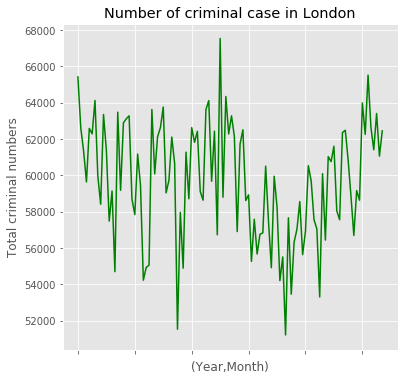

In [40]:
graphTB.plot(kind='line',figsize=(6,6),color='green')
plt.title('Number of criminal case in London')
plt.ylabel('Total criminal numbers')
plt.xlabel('(Year,Month)')
plt.show()

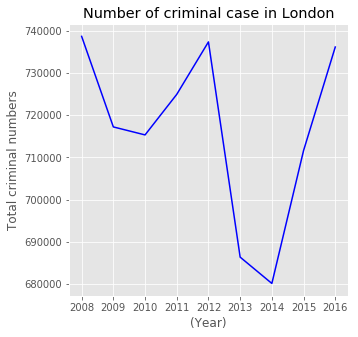

In [38]:
graphT.plot(kind='line',figsize=(5,5),color='blue')
plt.title('Number of criminal case in London')
plt.ylabel('Total criminal numbers')
plt.xlabel('(Year)')
plt.show()

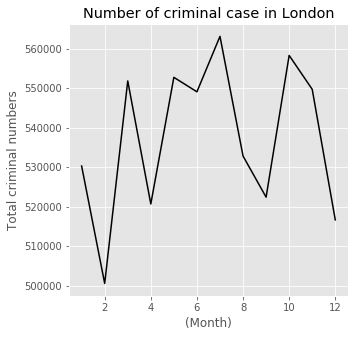

In [42]:
graphB.plot(kind='line',figsize=(5,5),color='black')
plt.title('Number of criminal case in London')
plt.ylabel('Total criminal numbers')
plt.xlabel('(Month)')
plt.show()

#membuat pie chart persentase kategori kriminal terbesar di london

In [17]:
pie = df_london.copy()
pie_chart = pie.groupby('major_category',axis=0).sum()
pie_chart

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


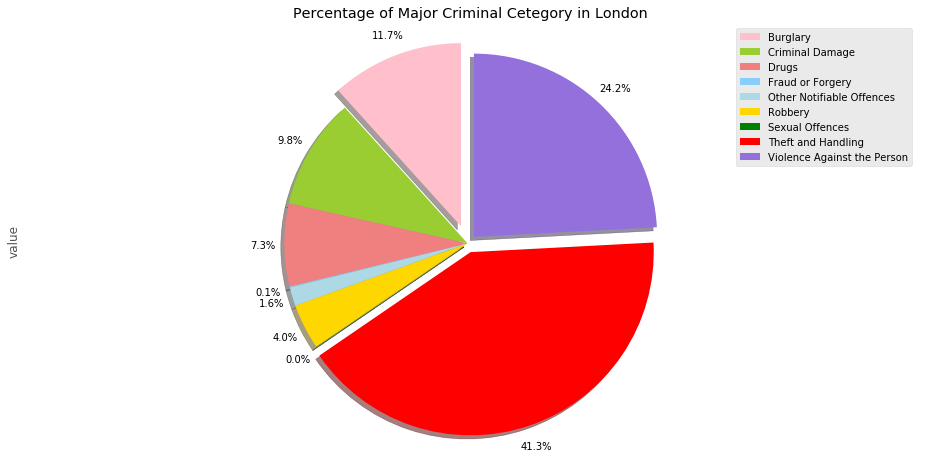

In [24]:
colors_list = ['pink','yellowgreen','lightcoral','lightskyblue',
              'lightblue','gold','green','red','mediumpurple']
explode_list = [0.1,0,0,0,0,0,0,0.05,0.05]
pie_chart['value'].plot(kind='pie', 
                      figsize=(16,8),
                      autopct='%1.1f%%', 
                      startangle=90,
                      shadow=True,
                      labels=None,
                      pctdistance=1.12,
                      colors=colors_list,
                      explode=explode_list)
plt.title('Percentage of Major Criminal Cetegory in London')
plt.axis('equal')
plt.legend(labels=pie_chart.index,loc='upper right')
plt.show()

#lima kota dengan kriminalitas terbesar

In [27]:
bargraph = pie.groupby('borough',axis=0).sum()
bargraph.sort_values(by='value',ascending=True,inplace=True)
bargraph_top5=bargraph['value'].tail(5)
bargraph_top5

borough
Newham         262024
Camden         275147
Southwark      278809
Lambeth        292178
Westminster    455028
Name: value, dtype: int64

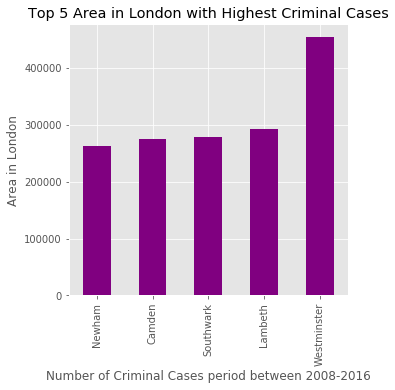

In [46]:
bargraph_top5.plot(kind='bar',figsize=(5,5),color='purple')
plt.xlabel('Number of Criminal Cases period between 2008-2016')
plt.ylabel('Area in London')
plt.title('Top 5 Area in London with Highest Criminal Cases')
plt.show()